# <center> Support Vector Machine
SVM with default parameter settings is trained on feature set 2

## <font color='royalblue'> Get the data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([6, 6, 5, ..., 0, 4, 1])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 4, ..
y_32_train                -> array([0, 3, 4, ..., 0, 3, 1])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(sorted(X_32test_std.keys()))

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color='royalblue'>Train and test the classifier

In [4]:
#Train the classifier

from sklearn import svm

svm = svm.SVC(cache_size = 5000)

start = time()
svm.fit(X_train_std, y_train) 
print("Training took %.2f seconds"%(time() - start))

print(" ")
print("Classifier:")
print(svm)

Training took 534.00 seconds
 
Classifier:
SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [6]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = svm.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("SVM's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
SVM's accuracy on -20 dB SNR samples =  0.128
SVM's accuracy on -18 dB SNR samples =  0.13
SVM's accuracy on -16 dB SNR samples =  0.13275
SVM's accuracy on -14 dB SNR samples =  0.13875
SVM's accuracy on -12 dB SNR samples =  0.14825
SVM's accuracy on -10 dB SNR samples =  0.1815
SVM's accuracy on -8 dB SNR samples =  0.261
SVM's accuracy on -6 dB SNR samples =  0.344
SVM's accuracy on -4 dB SNR samples =  0.4045
SVM's accuracy on -2 dB SNR samples =  0.4055
SVM's accuracy on 0 dB SNR samples =  0.51
SVM's accuracy on 2 dB SNR samples =  0.644
SVM's accuracy on 4 dB SNR samples =  0.71375
SVM's accuracy on 6 dB SNR samples =  0.72175
SVM's accuracy on 8 dB SNR samples =  0.71825
SVM's accuracy on 10 dB SNR samples =  0.71825
SVM's accuracy on 12 dB SNR samples =  0.72375
SVM's accuracy on 14 dB SNR samples =  0.7345
SVM's accuracy on 16 dB SNR samples =  0.7215
SVM's accuracy on 18 dB SNR samples =  0.7315


## <font color='royalblue'> Visualize classifier performance

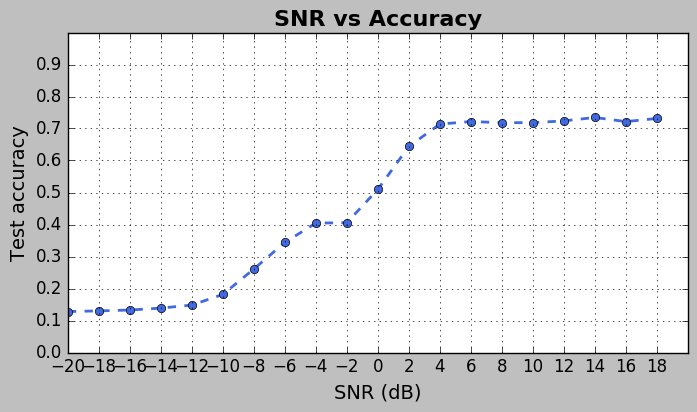

In [7]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(svm, "svm1.1.pkl")

['svm1.1.pkl']

In [3]:
import pickle
from sklearn.externals import joblib

svm = joblib.load("svm1.1.pkl")